<a href="https://colab.research.google.com/github/VimalChamyal/AY-dive_deep/blob/main/3_PMAYG_Merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My understanding of the data - AwaasPlus Step-Wise Progress

This data includes:
1. Implementation coverage (GP having awaasplus data)
2. Digital linkage metrics (Aadhaar, NREGA job card)
3. Vetting and registration milestones
- This gives us implementation progress per state.



In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the datasets
df_awasplus = pd.read_csv("https://raw.githubusercontent.com/VimalChamyal/AY-dive_deep/refs/heads/main/all_states_aawas_plus.csv")
df_target = pd.read_csv("https://raw.githubusercontent.com/VimalChamyal/AY-dive_deep/refs/heads/main/state_level.csv")

In [ ]:
# Standardizing column names for merging
df_awasplus.rename(columns={"Name": "State"}, inplace=True)
df_target.rename(columns={"State Name": "State"}, inplace=True)

In [ ]:
# Removing any rows like 'Total' or empty state names
df_awasplus = df_awasplus[df_awasplus["State"].notna()]
df_target = df_target[df_target["State"].notna()]

In [ ]:
# Converting all numeric columns to appropriate format
for col in df_awasplus.columns[2:]:
    df_awasplus[col] = pd.to_numeric(df_awasplus[col], errors='coerce')

for col in df_target.columns[2:]:
    df_target[col] = pd.to_numeric(df_target[col], errors='coerce')

In [ ]:
# Merging datasets on State
df_merged = pd.merge(df_awasplus, df_target, on="State", how="inner")

In [ ]:
df_merged

,#SNo_x,State,GP having awaasplus data,Adhaar seeding completed,Nrega job card seeding completed,Cleaning of data-remand completed,Minority separation done,Nrega Mandays Updated,System Priority list generated,Gram Sabha Resolution has been uploaded,GP having no eligible beneficiary left,Priority list-gram panchayat vetting done,priority list-district vetting done,Registration Done,#SNo_y,Target given by MoRD,SCST,Minority,Others,Total
0,1,ARUNACHAL PRADESH,347,253,347,346,1,346,346,344,2,344,343,341,1.0,41596,34001,572,1695,35696
1,2,ASSAM,2613,21,2613,2613,2020,2613,2613,2613,1,2611,2611,2611,2.0,1581833,175686,425448,696032,871718
2,3,BIHAR,7632,3840,7632,7632,5947,7632,7632,7626,15,7625,7616,7610,3.0,3925659,796130,560273,3261991,4058121
3,4,CHHATTISGARH,10460,8453,10397,10431,409,10381,10377,10354,21,10337,10319,10280,4.0,1097150,661226,6208,435924,1097150
4,5,GOA,0,0,0,0,0,0,0,0,0,0,0,0,5.0,1707,180,76,247,427
5,6,GUJARAT,10931,7606,10922,10929,1856,10919,10919,10594,50,10582,10853,10776,6.0,449167,243654,9556,193360,440600
6,7,HARYANA,3607,2752,3595,3586,467,3576,3574,3501,80,3462,3417,3312,7.0,30789,18515,3822,11084,29599
7,8,HIMACHAL PRADESH,3196,2089,3195,3195,155,3153,3153,3160,85,2529,2149,2142,8.0,15483,8482,1212,7149,15635
8,9,JAMMU AND KASHMIR,3242,2078,3235,3242,305,3235,3235,3175,25,3171,3204,3166,9.0,201633,99108,511,87791,186899
9,10,JHARKHAND,3910,1821,3862,3910,2383,3910,3910,3881,10,3879,3898,3875,10.0,1616272,836177,186174,730409,1610064


Computing the Key Indicators

Here’s the code to generate the required performance and equity indicators:

In [ ]:
# Computing metrics
df_merged["registration_pct"] = (df_merged["Registration Done"] / df_merged["GP having awaasplus data"]) * 100
df_merged["aadhaar_pct"] = (df_merged["Adhaar seeding completed"] / df_merged["GP having awaasplus data"]) * 100
df_merged["target_achieved_pct"] = (df_merged["Total"] / df_merged["Target given by MoRD"]) * 100
df_merged["scst_share_pct"] = (df_merged["SCST"] / df_merged["Total"]) * 100
df_merged["minority_share_pct"] = (df_merged["Minority"] / df_merged["Total"]) * 100

Ranking & Classifying the States

Objective of this step
1. Identify Best Implementers
2. Flag Lagging States
3. Spot Inequitable States

In [ ]:
top_registration = df_merged.sort_values(by="registration_pct", ascending=False).head(5)
lagging_aadhaar = df_merged.query("aadhaar_pct < 50")
inequitable_states = df_merged.query("scst_share_pct < 60 or minority_share_pct < 15")

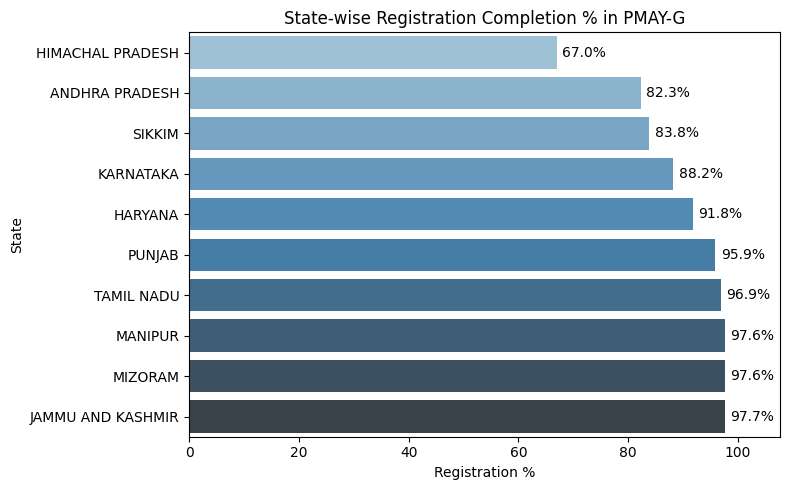

In [ ]:
df_sorted = df_merged.sort_values(by="registration_pct", ascending=True).head(10)

# Create the barplot, setting hue to y-axis variable with legend=False
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x="registration_pct",
    y="State",
    data=df_sorted,
    hue="State",  # use State as hue to enable palette
    palette="Blues_d",
    dodge=False,  # don't shift bars
    legend=False  # suppress legend since hue is just for color
)

# Add % labels to the right of each bar
for bar in ax.patches:
    plt.text(
        bar.get_width() + 1,
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.1f}%',
        va='center',
        fontsize=10
    )

plt.title("State-wise Registration Completion % in PMAY-G")
plt.xlabel("Registration %")
plt.ylabel("State")
plt.xlim(0, df_sorted["registration_pct"].max() + 10)  # room for labels
plt.tight_layout()
plt.show()

Understanding the Implementation Quality

In [ ]:
def add_percentage_labels(ax, offset=1.0, fontsize=10):
    """Add % labels to the right of each horizontal bar in a seaborn barplot"""
    for bar in ax.patches:
        value = bar.get_width()
        ax.text(
            value + offset,
            bar.get_y() + bar.get_height() / 2,
            f'{value:.1f}%',
            va='center',
            fontsize=fontsize
        )

1. Aadhaar Seeding % by State

Let us check which states have effectively digitized beneficiary identity verification.

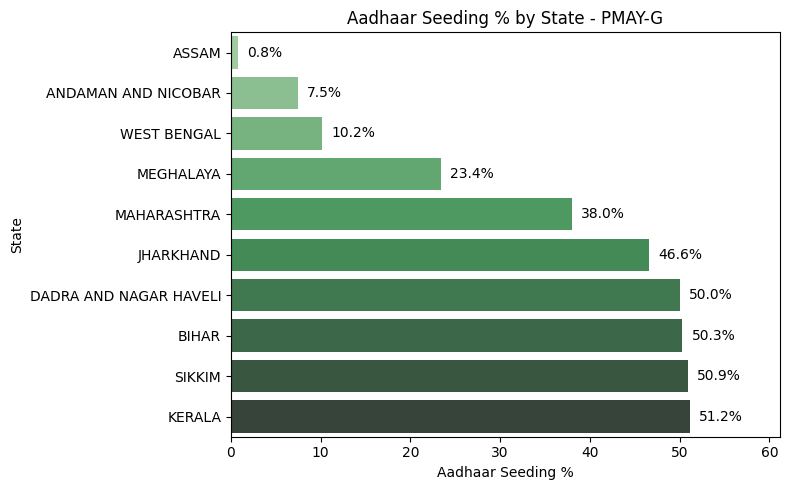

In [ ]:
plt.figure(figsize=(8, 5))

# Sort by aadhaar_pct
df_sorted = df_merged.sort_values(by="aadhaar_pct", ascending=True).head(10)

# Create barplot
ax = sns.barplot(
    x="aadhaar_pct",
    y="State",
    data=df_sorted,
    hue="State",
    palette="Greens_d",
    legend=False
)

# Add percentage labels to each bar
add_percentage_labels(ax)

# Final plot touches
plt.title("Aadhaar Seeding % by State - PMAY-G")
plt.xlabel("Aadhaar Seeding %")
plt.ylabel("State")
plt.xlim(0, df_sorted["aadhaar_pct"].max() + 10)
plt.tight_layout()
plt.show()

2. NREGA Job Card Seeding % by State

Reveals potential for employment-linked housing benefits

In [ ]:
df_merged["nrega_pct"] = (df_merged["Nrega job card seeding completed"] / df_merged["GP having awaasplus data"]) * 100

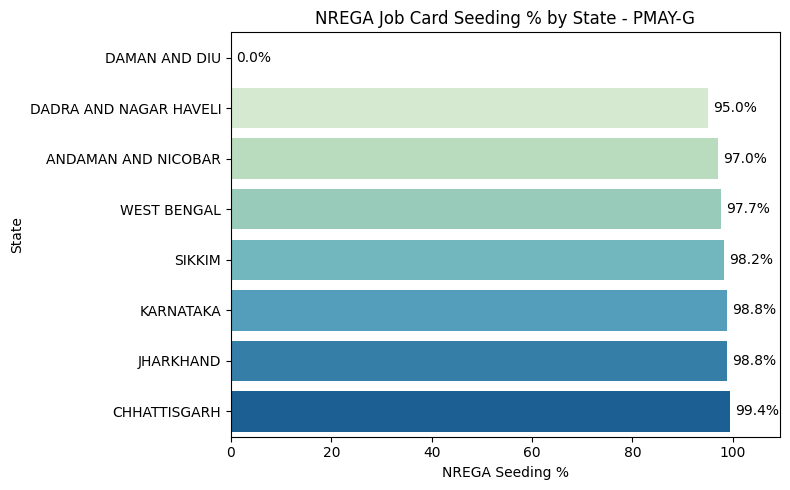

In [ ]:
plt.figure(figsize=(8, 5))
df_sorted = df_merged.sort_values(by="nrega_pct", ascending=True).head(8)
ax = sns.barplot(x="nrega_pct", y="State", data=df_sorted, hue="State", palette="GnBu", legend=False)
add_percentage_labels(ax)
plt.title("NREGA Job Card Seeding % by State - PMAY-G")
plt.xlabel("NREGA Seeding %")
plt.ylabel("State")
plt.xlim(0, df_sorted["nrega_pct"].max() + 10)
plt.tight_layout()
plt.show()

Understanding Equity Assessment

1.  SC/ST Share % vs Target (60%)

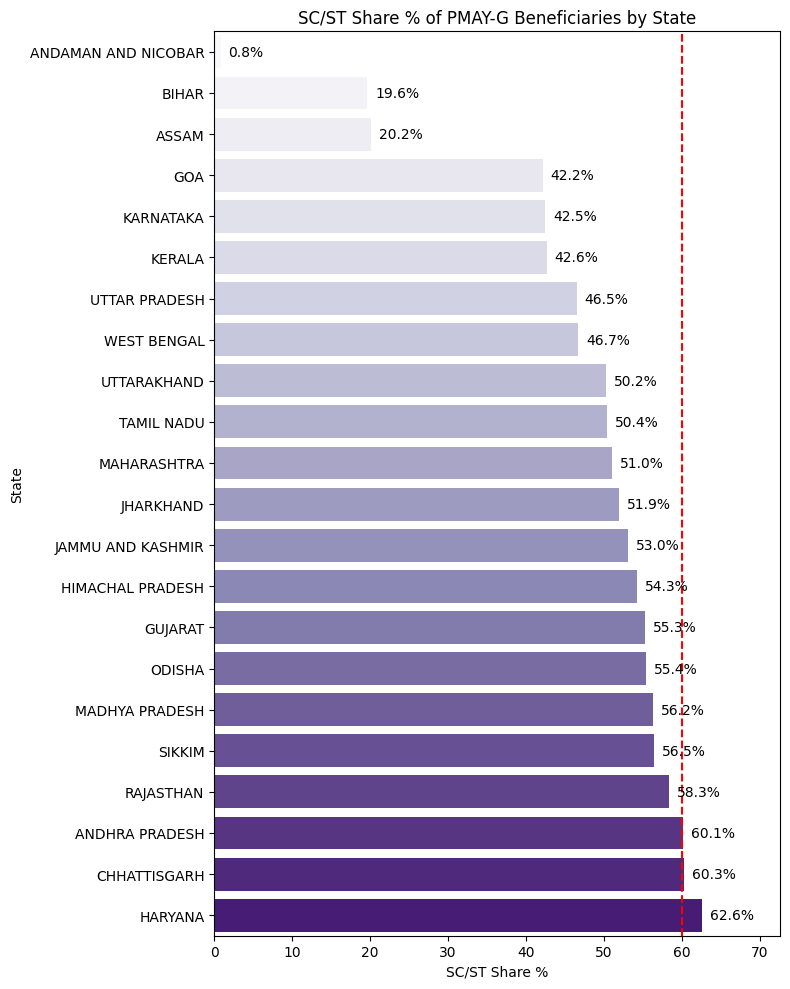

In [ ]:
plt.figure(figsize=(8, 10))
df_sorted = df_merged.sort_values(by="scst_share_pct", ascending=True).head(22)
ax = sns.barplot(x="scst_share_pct", y="State", data=df_sorted, hue="State", palette="Purples", legend=False)
plt.axvline(60, color='red', linestyle='--', label='Guideline: 60%')
add_percentage_labels(ax)
plt.title("SC/ST Share % of PMAY-G Beneficiaries by State")
plt.xlabel("SC/ST Share %")
plt.ylabel("State")
plt.xlim(0, df_sorted["scst_share_pct"].max() + 10)
plt.tight_layout()
plt.show()

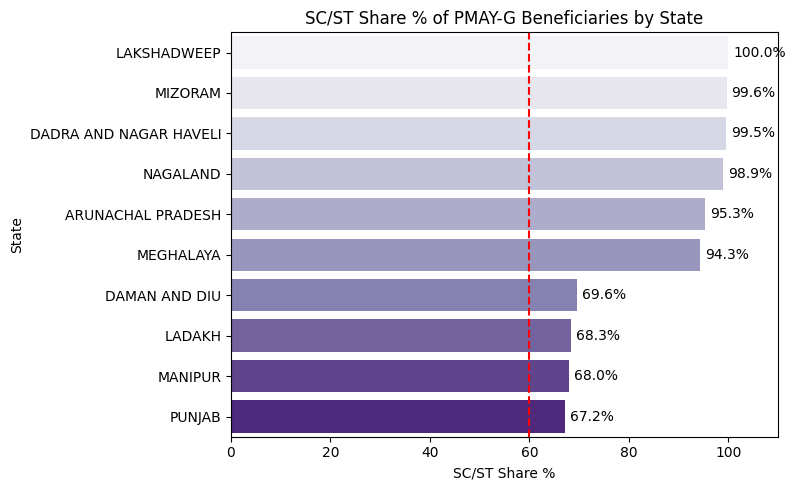

In [ ]:
plt.figure(figsize=(8, 5))
df_sorted = df_merged.sort_values(by="scst_share_pct", ascending=False).head(10)
ax = sns.barplot(x="scst_share_pct", y="State", data=df_sorted, hue="State", palette="Purples", legend=False)
plt.axvline(60, color='red', linestyle='--', label='Guideline: 60%')
add_percentage_labels(ax)
plt.title("SC/ST Share % of PMAY-G Beneficiaries by State")
plt.xlabel("SC/ST Share %")
plt.ylabel("State")
plt.xlim(0, df_sorted["scst_share_pct"].max() + 10)
plt.tight_layout()
plt.show()

2. Minority Share % vs Target (15%)

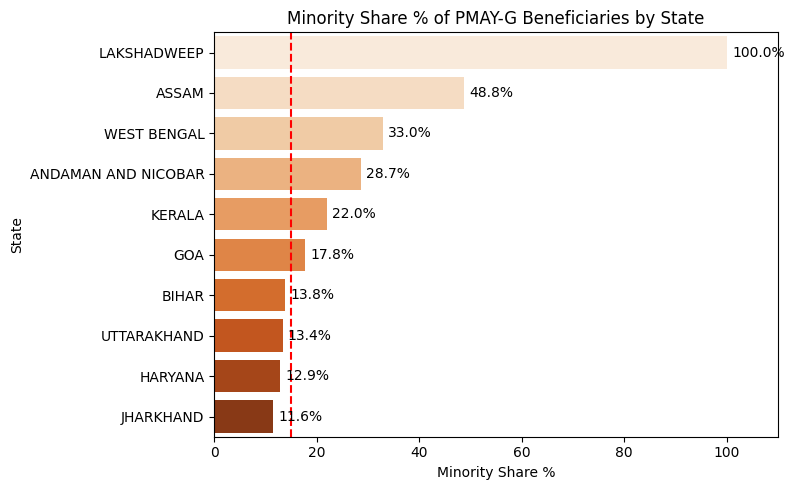

In [ ]:
plt.figure(figsize=(8, 5))
df_sorted = df_merged.sort_values(by="minority_share_pct", ascending=False).head(10)
ax = sns.barplot(x="minority_share_pct", y="State", data=df_sorted, hue="State", palette="Oranges", legend=False)
plt.axvline(15, color='red', linestyle='--', label='Guideline: 15%')
add_percentage_labels(ax)
plt.title("Minority Share % of PMAY-G Beneficiaries by State")
plt.xlabel("Minority Share %")
plt.ylabel("State")
plt.xlim(0, df_sorted["minority_share_pct"].max() + 10)
plt.tight_layout()
plt.show()

Understanding Target Achievement

1. Target Achieved % by State

Let's see which states met or exceeded MoRD targets

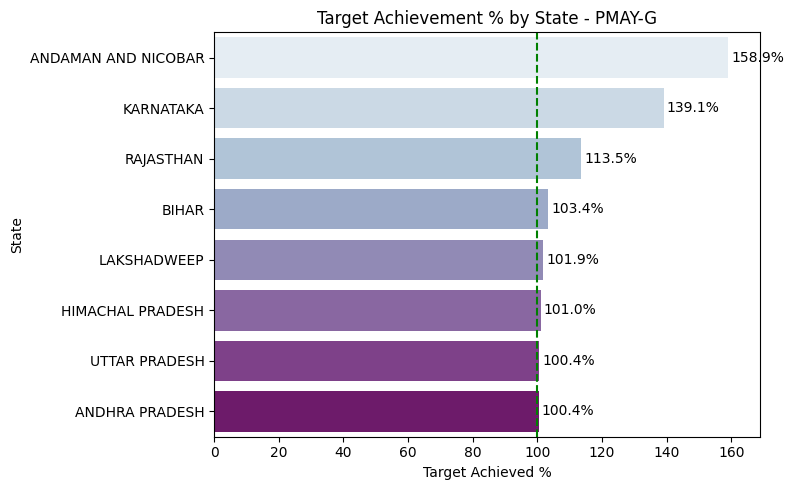

In [ ]:
plt.figure(figsize=(8, 5))
df_sorted = df_merged.sort_values(by="target_achieved_pct", ascending=False).head(8)
ax = sns.barplot(x="target_achieved_pct", y="State", data=df_sorted, hue="State", palette="BuPu", legend=False)
plt.axvline(100, color='green', linestyle='--', label='MoRD Target (100%)')
add_percentage_labels(ax)
plt.title("Target Achievement % by State - PMAY-G")
plt.xlabel("Target Achieved %")
plt.ylabel("State")
plt.xlim(0, df_sorted["target_achieved_pct"].max() + 10)
plt.tight_layout()
plt.show()

2. Drop-off After Aadhaar to Registration

Shows states where Aadhaar seeding is done but registrations are low.

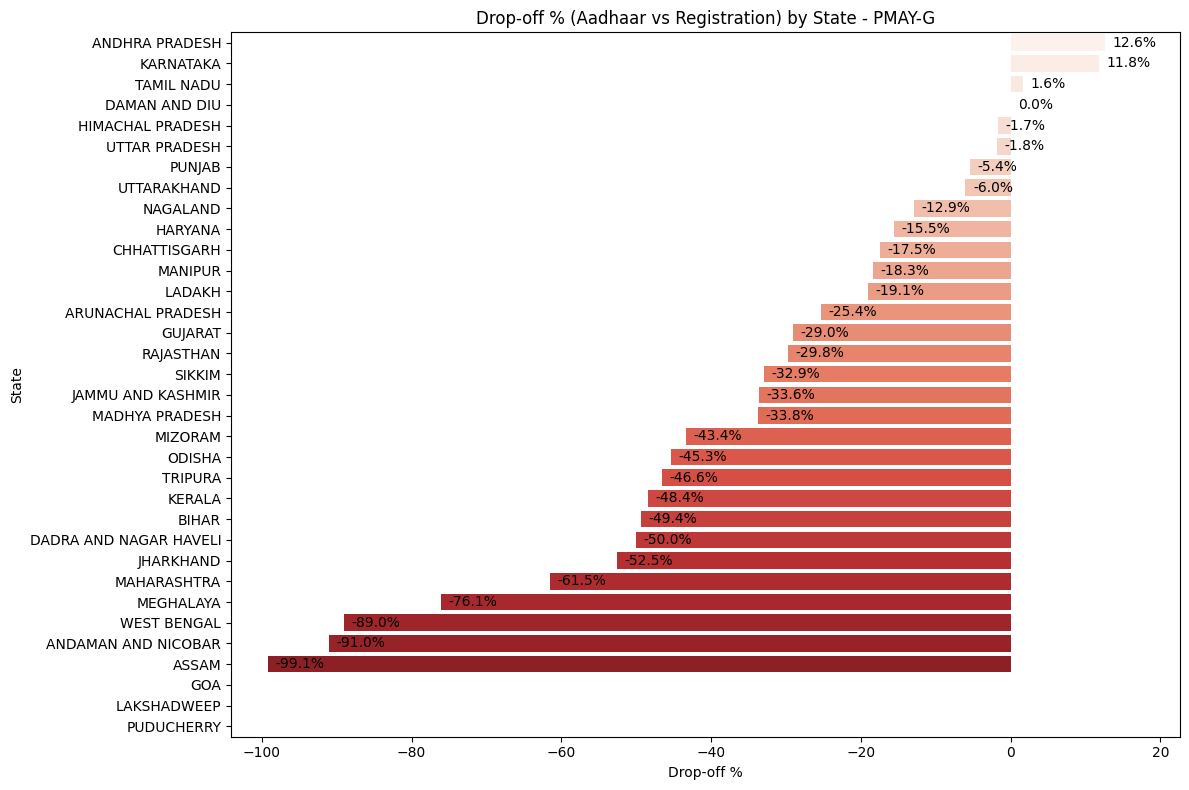

In [ ]:
df_merged["drop_pct"] = df_merged["aadhaar_pct"] - df_merged["registration_pct"]

plt.figure(figsize=(12, 8))
df_sorted = df_merged.sort_values(by="drop_pct", ascending=False)
ax = sns.barplot(x="drop_pct", y="State", data=df_sorted, hue="State", palette="Reds", legend=False)
add_percentage_labels(ax)
plt.title("Drop-off % (Aadhaar vs Registration) by State - PMAY-G")
plt.xlabel("Drop-off %")
plt.ylabel("State")
plt.xlim(df_sorted["drop_pct"].min() - 5, df_sorted["drop_pct"].max() + 10)
plt.tight_layout()
plt.show()

Heatmap

Quick visual way to compare across all metrics in one view

In [ ]:
cols = [
    "registration_pct",
    "aadhaar_pct",
    "nrega_pct",
    "target_achieved_pct",
    "scst_share_pct",
    "minority_share_pct"
]

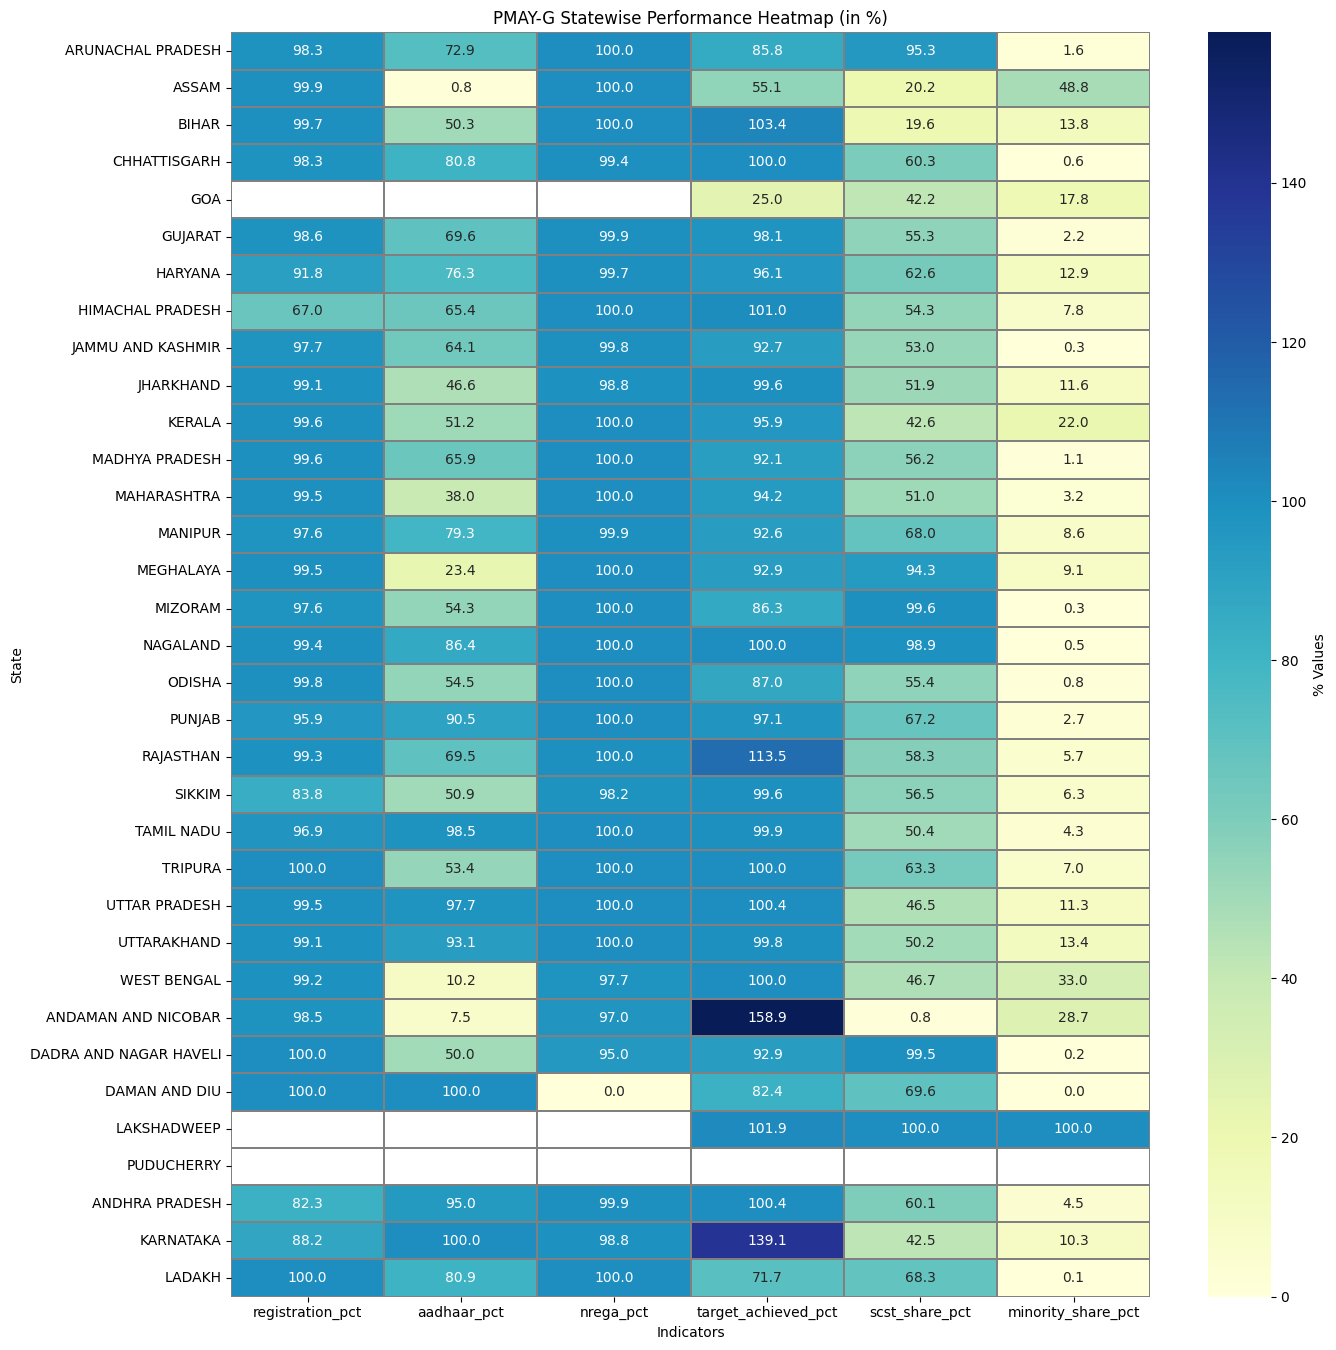

In [ ]:
# Set index to State for better readability
heatmap_data = df_merged.set_index("State")[cols]

# Create the heatmap
plt.figure(figsize=(14, len(heatmap_data) * 0.4))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",          # blue-green palette
    annot=True,             # show numbers
    fmt=".1f",              # one decimal place
    linewidths=0.3,
    linecolor="gray",
    cbar_kws={'label': '% Values'}
)

plt.title("PMAY-G Statewise Performance Heatmap (in %)")
plt.xlabel("Indicators")
plt.ylabel("State")
plt.tight_layout()
plt.show()

Summary table

In [ ]:
# Select only relevant columns
cols = [
    "State",
    "registration_pct",
    "aadhaar_pct",
    "nrega_pct",
    "target_achieved_pct",
    "scst_share_pct",
    "minority_share_pct"
]

summary_table = df_merged[cols].copy()

# Round to one decimal for neatness
summary_table = summary_table.round(1)

# Sort alphabetically or by any column, for example by registration_pct
summary_table = summary_table.sort_values(by="registration_pct", ascending=False)

# Reset index for neat table display
summary_table.reset_index(drop=True, inplace=True)

# Display in notebook
summary_table


,State,registration_pct,aadhaar_pct,nrega_pct,target_achieved_pct,scst_share_pct,minority_share_pct
0,DAMAN AND DIU,100.0,100.0,0.0,82.4,69.6,0.0
1,LADAKH,100.0,80.9,100.0,71.7,68.3,0.1
2,TRIPURA,100.0,53.4,100.0,100.0,63.3,7.0
3,DADRA AND NAGAR HAVELI,100.0,50.0,95.0,92.9,99.5,0.2
4,ASSAM,99.9,0.8,100.0,55.1,20.2,48.8
5,ODISHA,99.8,54.5,100.0,87.0,55.4,0.8
6,BIHAR,99.7,50.3,100.0,103.4,19.6,13.8
7,KERALA,99.6,51.2,100.0,95.9,42.6,22.0
8,MADHYA PRADESH,99.6,65.9,100.0,92.1,56.2,1.1
9,UTTAR PRADESH,99.5,97.7,100.0,100.4,46.5,11.3
